In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
from path import Path
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

1.0.1.post2
True


In [2]:
from torch import nn
import numpy as np
from torch import nn
import torch.nn.functional as F

In [3]:
import os
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
df=pd.DataFrame()
azz={}

In [4]:
def plot_roc(y_test,y_score,n_classes):
    #y_test=N_elements
    #y_score=N_elements X N_classes
#     fpr = dict()
#     tpr = dict()
    file1 = open("ild_roc_pts_mlp.txt","a")
    y_test = label_binarize(y_test, classes=[0, 1, 2])
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    plt.figure()
    lw = 2
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    azz['fpr']=fpr["macro"]
    azz['tpr']=tpr["macro"]

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    print(fpr['macro'].shape,tpr['macro'].shape,roc_auc["macro"])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('MLP  FOR  ILD  DATASET')
    plt.legend(loc="lower right")
    plt.show()



In [5]:
seed=4
df=pd.read_csv("../../data/ILD.csv")
no_of_rows,no_of_cols=df.shape
print (no_of_rows,no_of_cols)
df.head()

18144 31


,id_ref,gen_name,v1,v2,v3,v4,v5,v6,v7,v8,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29
0,117_at,HSPA6,9.30153,7.76291,8.22701,6.53772,7.07184,6.52416,8.44547,9.12909,...,7.65737,7.57223,6.32249,8.68267,7.96583,7.06424,7.83115,7.10093,8.22633,7.02261
1,1552256_a_at,SCARB1,9.23851,8.72522,9.64837,8.57190,8.65099,7.83348,9.23631,7.48586,...,7.62708,8.58799,8.29108,10.14260,8.76561,8.72965,9.03287,8.62517,9.47877,8.99476
2,1552264_a_at,MAPK1,7.66847,6.33183,7.63279,6.88978,5.22121,7.19912,6.05334,7.88042,...,6.59411,6.97608,7.01681,6.22543,7.47331,5.71312,6.74352,6.95748,6.91755,6.51478
3,1552266_at,ADAM32,2.93300,3.21916,2.90779,2.92548,3.00375,2.92548,3.48475,2.90148,...,2.87648,2.88108,2.88388,3.70028,2.89574,2.89005,2.80739,2.86702,2.92548,2.96130
4,1552269_at,SPATA17,3.28760,3.28215,3.23187,4.13789,3.28960,3.67241,3.32874,3.35934,...,3.26634,3.26095,3.24001,3.30414,3.26701,3.22343,3.18599,3.27333,3.26745,3.29148


In [6]:
header_of_pd=['v'+str(i+1) for i in range(no_of_cols-2)]
X=np.array(df[header_of_pd])
print(X.shape)

(18144, 29)


In [7]:
fil=open('../../data/labels_ILD.txt','r')
tmp=list()
for line in fil:
	tmp.append(int(line))

Y=np.array(tmp)


In [8]:
augmented_X=[]
augmented_Y=[]
a=0
b=0
c=0
d=0
choice=0
t=0
for i in Y:
    if i==0:
        
        choice=1
        a=a+choice
    elif i==1:
        choice=2
        b=b+choice
        
    elif i==2:
        choice=4
        c=c+choice
    for u in range(choice):
        augmented_X.append(X[t])
        augmented_Y.append(Y[t])
    t=t+1
    
print(a,b,c,d)
augmented_X=np.array(augmented_X)
augmented_Y=np.array(augmented_Y)

9947 10952 10884 0


In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(augmented_X,augmented_Y,test_size=0.20,random_state=2)
print(X_test.shape)

(6357, 29)


In [10]:
class Net(torch.nn.Module):
    def __init__(self, n_feature,out_features):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature,450)
        self.hidden2 = torch.nn.Linear(450,225)
        self.hidden3 = torch.nn.Linear(225,15)
        self.predict = torch.nn.Linear(15,out_features)
        self.bn1 = nn.BatchNorm1d(num_features=450)
        self.bn2 = nn.BatchNorm1d(num_features=225)
        self.bn3 = nn.BatchNorm1d(num_features=15)
        self.dropout=nn.Dropout(0.2)

        
    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x=self.bn1(x)
        x=self.dropout(x)
        x = F.relu(self.hidden2(x))
        x=self.bn2(x)
        x =F.relu(self.hidden3(x))
        x=self.bn3(x)
        x=self.dropout(x)
        x=F.relu(self.predict(x))
        return x
def accurate():
    total = X_test.shape[0]
    x_test=torch.tensor(X_test,dtype=torch.float)
    y_test=torch.tensor(Y_test,dtype=torch.long)
    outputs = MP(x_test)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted.cpu() == y_test).sum()
    confusion_matrix = torch.zeros(3, 3)
    print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))
    for t, p in zip(y_test.view(-1), predicted.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1
    print(confusion_matrix)

In [11]:
MP=Net(29,3)
#load stat
MP.load_state_dict(torch.load(Path('MLP_ILD_13.pt')))
total = X_test.shape[0]
x_test=torch.tensor(X_test,dtype=torch.float)
y_test=torch.tensor(Y_test,dtype=torch.long)
outputs = MP(x_test)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted.cpu() == y_test).sum()
confusion_matrix = torch.zeros(3, 3)
print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))
for t, p in zip(y_test.view(-1), predicted.view(-1)):
 confusion_matrix[t.long(), p.long()] += 1
print(confusion_matrix)

Accuracy of the network on the test data: 87 %
tensor([[1.7680e+03, 1.0000e+00, 1.8700e+02],
        [0.0000e+00, 1.8330e+03, 3.5000e+02],
        [6.9000e+01, 2.1400e+02, 1.9350e+03]])


In [12]:
 print(outputs.shape,y_test.shape)

torch.Size([6357, 3]) torch.Size([6357])


(1146,) (1146,) 0.9289956411817257


<Figure size 432x288 with 0 Axes>

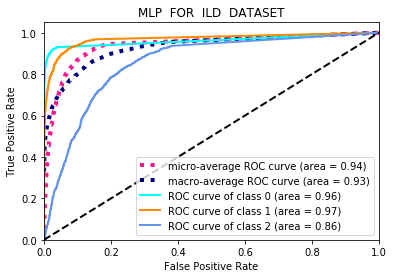

In [13]:
plot_roc(y_test.numpy(),outputs.detach().numpy(),3)

In [15]:
azz['fpr'].shape

(1146,)

In [16]:
dataset = pd.DataFrame({'fpr':azz['fpr'],'tpr':azz['tpr']})

In [17]:
dataset.to_csv('ild_mlp_roc.csv')